---
# Deep Neural Network
---

## I. Input the Libary and Perpare the Data


In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


sns.set_theme()

In [2]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/1. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,fractal_dimension_mean
0,M,0.14710,0.3001,0.2654,0.27760,184.60,0.7119,25.38,122.80,2019.0,1001.0,0.07871
1,M,0.07017,0.0869,0.1860,0.07864,158.80,0.2416,24.99,132.90,1956.0,1326.0,0.05667
2,M,0.12790,0.1974,0.2430,0.15990,152.50,0.4504,23.57,130.00,1709.0,1203.0,0.05999
3,M,0.10520,0.2414,0.2575,0.28390,98.87,0.6869,14.91,77.58,567.7,386.1,0.09744
4,M,0.10430,0.1980,0.1625,0.13280,152.20,0.4000,22.54,135.10,1575.0,1297.0,0.05883


In [3]:
benign = df[df.diagnosis == 'B']
malignant = df[df.diagnosis == 'M']

Text(0.5, 1.0, 'Linearly Data')

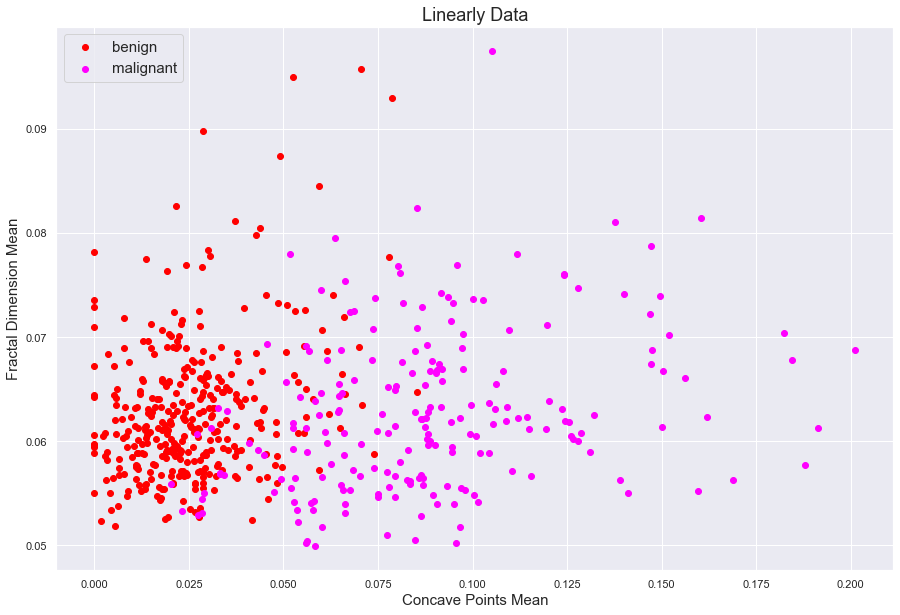

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "red", 
            label = "benign")
ax1.scatter(malignant['concave points_mean'], 
            malignant['fractal_dimension_mean'], 
            color = "magenta", 
            label = "malignant")
ax1.set_xlabel("Concave Points Mean", fontsize = 15)
ax1.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

In [5]:
X = df.drop('diagnosis', axis = 1).values
y = df['diagnosis']
y = np.where(y == "B", -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [6]:
def colors(y):
    if y == -1:
        return "lightseagreen"
    elif y == 1:
        return "red"


c_train = [colors(label) for label in y_train]
c_test = [colors(label) for label in y_test]


### II. Build a Machine Learning TensorFlow and Keras

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [9]:
model = Sequential([
Dense(units=2),
Dense(units=2),
Dense(units=2)
])
model = Sequential()
model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))
 

In [10]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
# Final output node for prediction
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [11]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
model.compile(optimizer='rmsprop', loss='mse')

2. After finish building the model, now we can train it and predict the outcome

In [14]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
13/13 [==============================] - 1s 1ms/step - loss: 0.9833
Epoch 2/250
13/13 [==============================] - 0s 1ms/step - loss: 0.9508
Epoch 3/250
13/13 [==============================] - 0s 1ms/step - loss: 0.9323
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.9138
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.8942
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.8742
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.8537
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.8329
Epoch 9/250
13/13 [==============================] - 0s 669us/step - loss: 0.8136
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.7924
Epoch 11/250
13/13 [==============================] - 0s 1ms/step - loss: 0.7708
Epoch 12/250
13/13 [==============================] - 0s 1ms/step - loss: 0.7502
Epoch 13/250
13/13 [===============

Text(0.5, 1.0, 'Training Loss per Epoch')

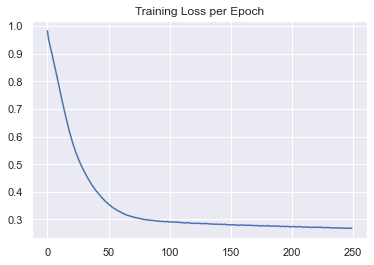

In [15]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch")

In [16]:
model.metrics_names
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

In [17]:
print(training_score)
print(test_score)

0.2669468820095062
0.320221483707428


In [19]:
predictions = model.predict(X_test)

pred_df = pd.DataFrame(y_test, columns=['Test Y'])
predictions = pd.Series(predictions.reshape(171,))
pred_df = pd.concat([pred_df, predictions], axis=1)
pred_df.columns = ['Test Y','Model Predictions']
pred_df

,Test Y,Model Predictions
0,1,1.086810
1,-1,0.305654
2,-1,-0.154394
3,1,0.656902
4,-1,-0.792478
...,...,...
166,-1,-0.907591
167,1,2.917372
168,1,-0.581450
169,-1,-0.995472


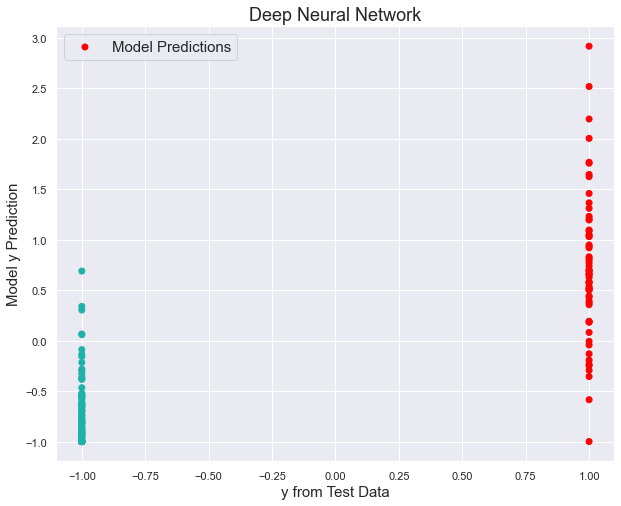

In [20]:
plt.figure(figsize = (10, 8))
plt.scatter(x='Test Y',
            y='Model Predictions',
            data = pred_df,
            color = c_test)
plt.xlabel("y from Test Data", fontsize = 15)
plt.ylabel("Model y Prediction", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Deep Neural Network", fontsize = 18)
plt.show()

---